# Applying custom preprocessing to images

In [10]:
import cv2
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
def apply_CLAHE_filter(image, clipLimit=2.0, tileGridSize=(8,8),
                        plot_filter=False):
    
    try: 
        clahe = cv2.createCLAHE(clipLimit=clipLimit,
                            tileGridSize=tileGridSize)
        image = clahe.apply(image)
        print('Filter applied successfully!')
    except:
        print('Filter applied unsuccessfully')

    if plot_filter == True:
        plt.imshow(image, cmap='gray')
        plt.title('CLAHE filter')
        plt.axis('off')

    return image

In [7]:
def read_and_decode(filename):
    # 1-> Read the file
    img = tf.io.read_file(filename)
    # 2-> Convert compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # 3 -> Custom preprocessing
    img = apply_CLAHE_filter(img)
    # 4-> Convert 3D uint8 to floats in the range [0,1]
    img = tf.image.convert_image_dtype(img, tf.float32)    
    return img

def decode_csv(csv_row):
    record_defaults = ["filepaths", "labels"]
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename)
    # label = tf.math.equal(CLASS_NAMES, label_string)
    return img, label_string

dataset = (tf.data.TextLineDataset(
    "new_train.csv").
    map(decode_csv))

Filter applied unsuccessfully


In [8]:
def plot_images(filename):
    matplotlib.rcParams.update({'font.size': 14})
    f, ax = plt.subplots(3, 5, figsize=(35,15))
    dataset = (tf.data.TextLineDataset(filename).
      map(decode_csv))
    for idx, (img, label) in enumerate(dataset.take(15)):
        ax[idx//5, idx%5].imshow((img.numpy()));
        ax[idx//5, idx%5].axis('off')

Filter applied unsuccessfully


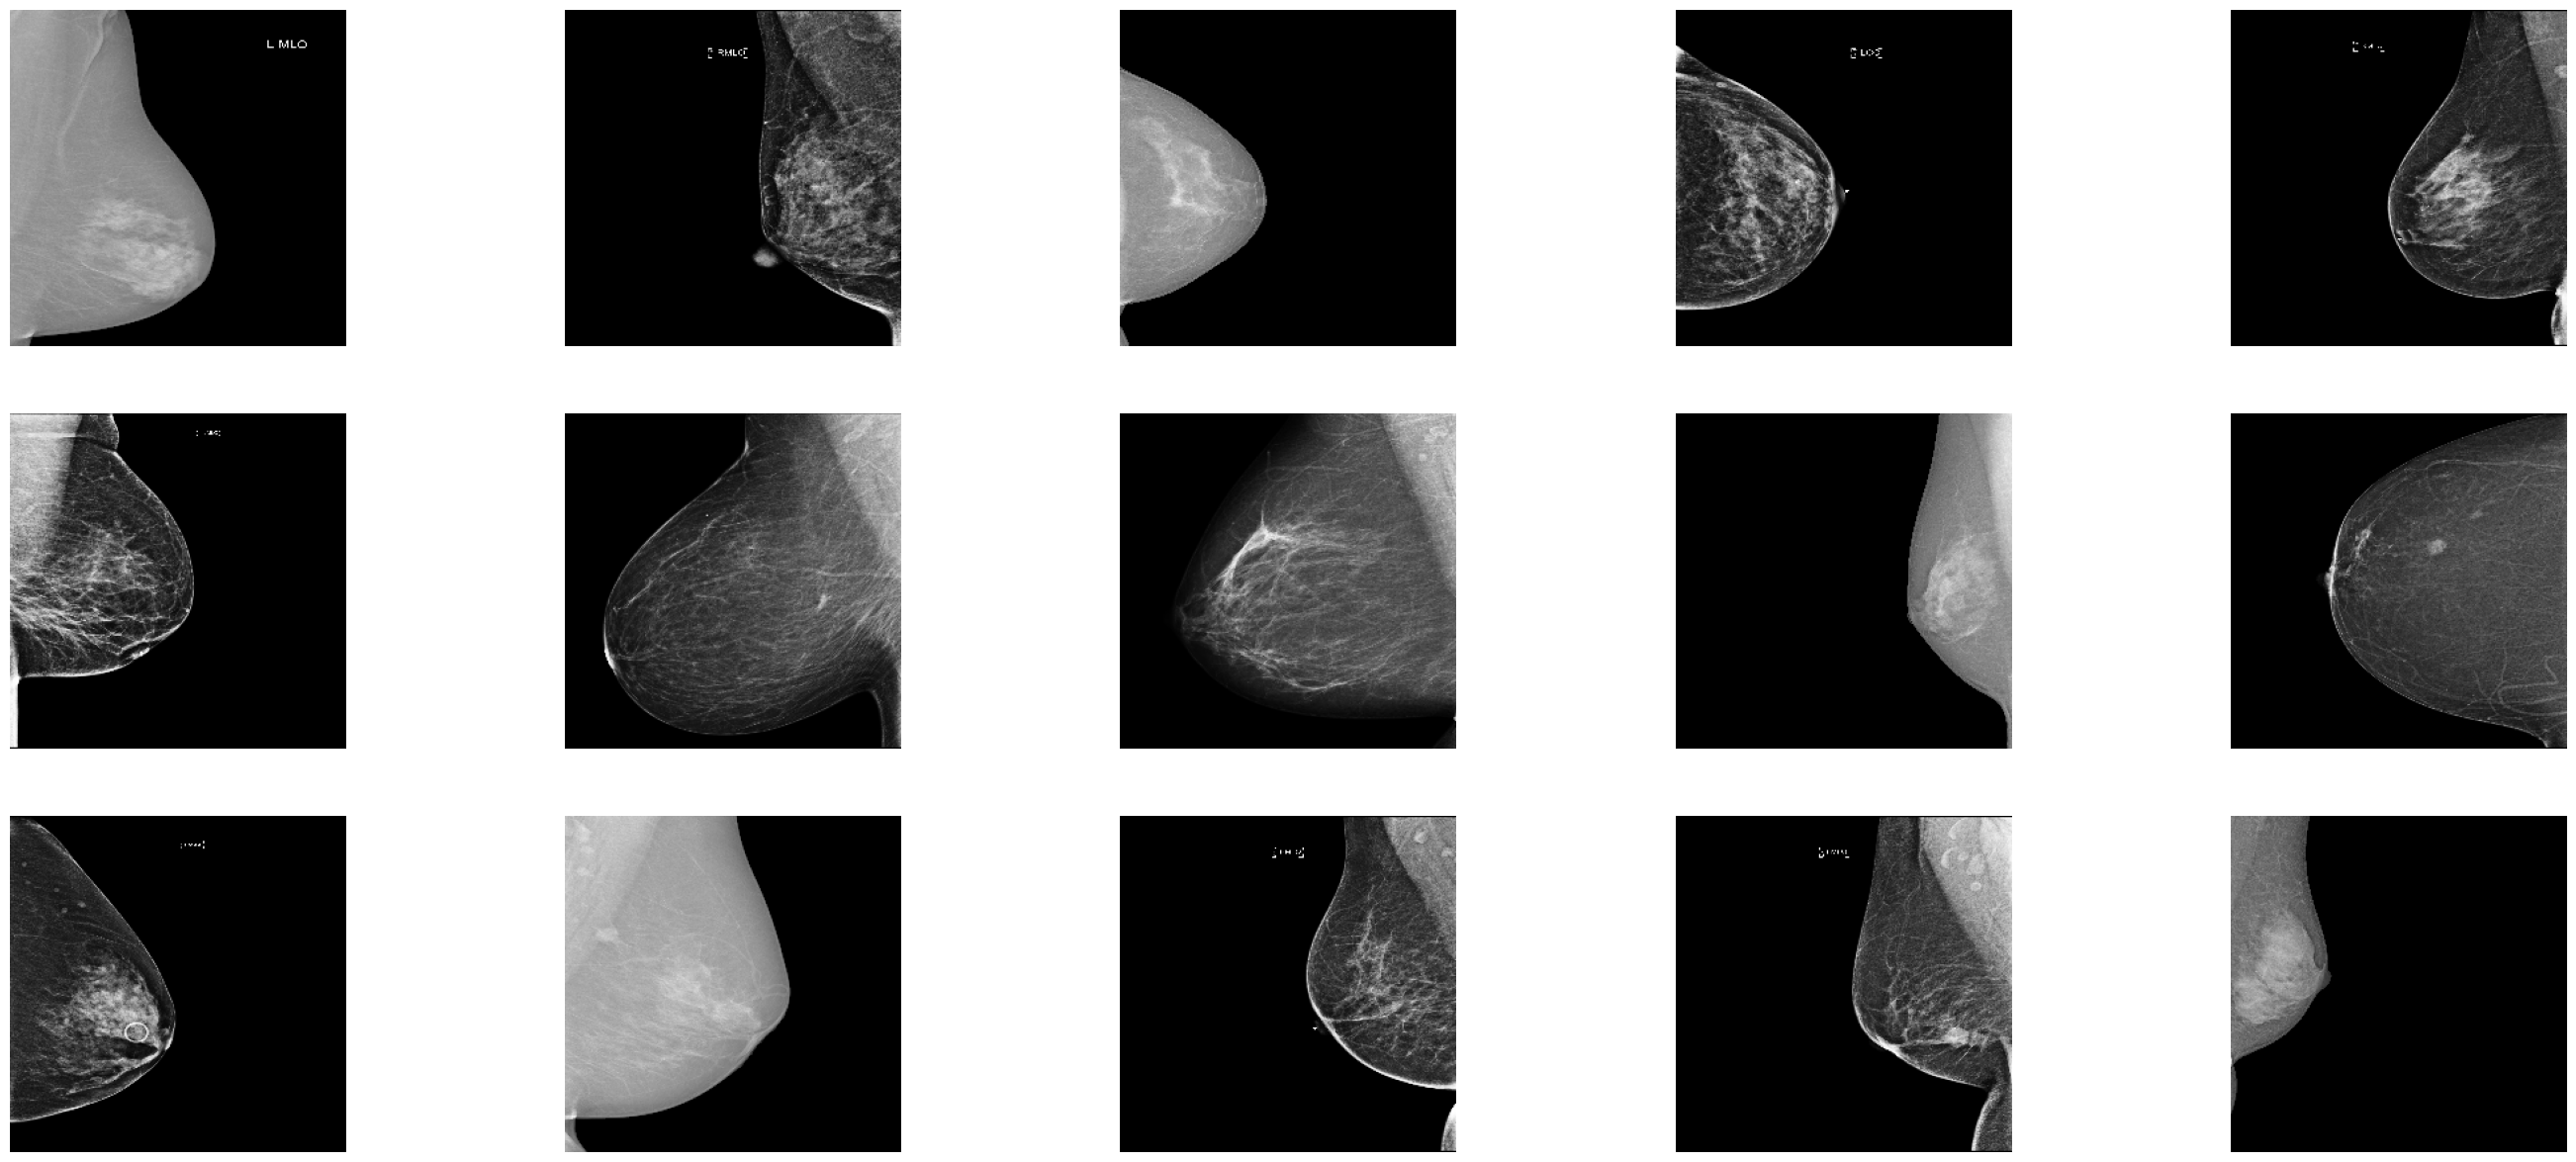

In [11]:
plot_images("new_train.csv")